In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\sonso\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
np.repeat(1,22)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
N_samples = [50, 50, 60]
G_samples = [20, 15, 24]
# Repeat 50 times 0, 50 times 1, and 60 times 2
group_idx = np.repeat(np.arange(len(N_samples)), N_samples)

data = []
for i in range(0, len(N_samples)):
    # Append 1 for good samples, and 0 for the rest, for each sample pool
    data.extend(np.repeat([1,0], [G_samples[i], N_samples[i] - G_samples[i]]))

In [28]:
with pm.Model() as model:
    mu = pm.Beta('mu', 1., 1.)
    kappa = pm.HalfNormal('kappa', 10)
    
    theta = pm.Beta('theta', alpha = mu * kappa, beta = (1.0 - mu) * kappa, shape = len(N_samples))
    y = pm.Bernoulli('y', p = theta[group_idx], observed = data)
    
    trace = pm.sample(3000, chains = 3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [theta, kappa, mu]
Sampling 3 chains, 0 divergences: 100%|██████████| 10500/10500 [00:17<00:00, 613.68draws/s]


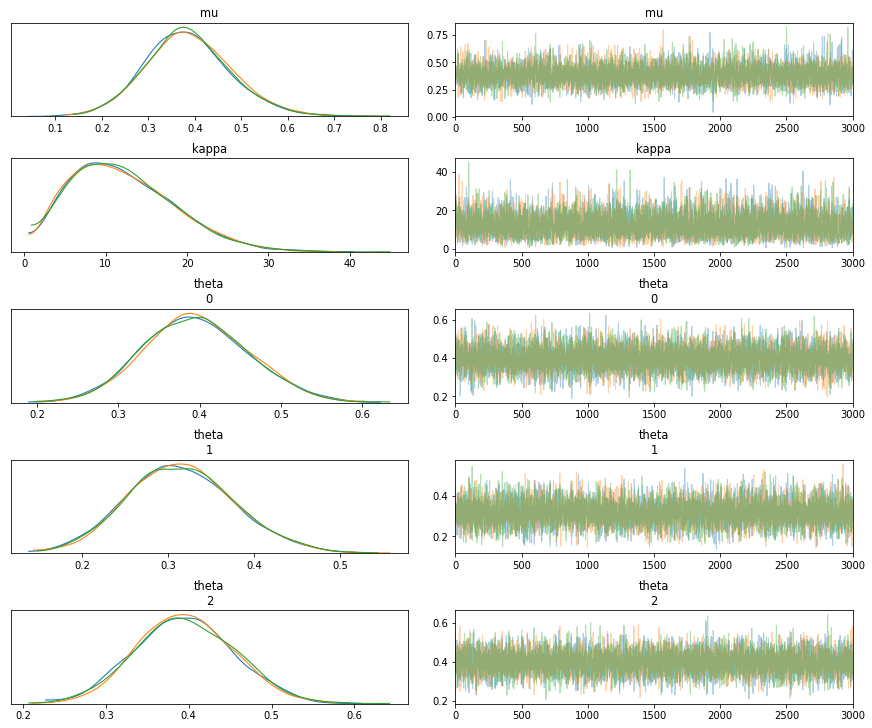

In [29]:
az.plot_trace(trace)
plt.show()

In [30]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.387,0.091,0.220,0.564,0.001,0.001,6189.0,5860.0,6323.0,5904.0,1.0
kappa,12.268,6.290,1.946,23.651,0.075,0.053,7008.0,7008.0,6169.0,4836.0,1.0
theta[0],0.396,0.064,0.281,0.518,0.001,0.000,8533.0,8438.0,8553.0,7204.0,1.0
theta[1],0.315,0.062,0.201,0.434,0.001,0.001,7169.0,7155.0,7136.0,6293.0,1.0
theta[2],0.396,0.058,0.292,0.509,0.001,0.000,8402.0,8402.0,8384.0,6806.0,1.0


## Extra Experiments, changing synthetic data

In [3]:
N_samples = [100, 100, 100]
G_samples = [50, 60, 50]

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)

data = []
for i in range(0, len(N_samples)):
    # Append 1 for good samples, and 0 for the rest, for each sample pool
    data.extend(np.repeat([1,0], [G_samples[i], N_samples[i] - G_samples[i]]))
    
with pm.Model() as model:
    mu = pm.Beta('mu', 1., 1.)
    kappa = pm.HalfNormal('kappa', 10)
    
    theta = pm.Beta('theta', alpha = mu * kappa, beta = (1.0 - mu) * kappa, shape = len(N_samples))
    y = pm.Bernoulli('y', p = theta[group_idx], observed = data)
    
    trace = pm.sample(3000, chains = 3)
az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [theta, kappa, mu]


Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 342 seconds.
C:\Users\sonso\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.528,0.090,0.360,0.695,0.001,0.001,6166.0,6166.0,6263.0,5583.0,1.0
kappa,12.515,6.280,1.702,23.633,0.075,0.053,7054.0,7054.0,6269.0,5192.0,1.0
theta[0],0.503,0.049,0.413,0.598,0.001,0.000,7984.0,7949.0,7979.0,6573.0,1.0
theta[1],0.592,0.048,0.497,0.679,0.001,0.000,7494.0,7490.0,7496.0,6237.0,1.0
theta[2],0.504,0.048,0.415,0.593,0.001,0.000,8724.0,8625.0,8725.0,6887.0,1.0


In [4]:
# Calculate HDI of some variables of trace
az.hdi(trace, var_names = ["mu", "kappa"])

C:\Users\sonso\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    mu       (hdi) float64 0.3603 0.6954
    kappa    (hdi) float64 1.702 23.63

In [5]:
# Calculate HDI over a particular selection
az.hdi(trace, coords = {"chain": [0, 1, 3]})

KeyError: 'Coords should follow mapping format {coord_name:[dim1, dim2]}. Check that coords structure is correct and dimensions are valid. "not all values found in index \'chain\'"'

In [32]:
N_samples = [100, 100, 100]
G_samples = [15, 20, 15]

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)

data = []
for i in range(0, len(N_samples)):
    # Append 1 for good samples, and 0 for the rest, for each sample pool
    data.extend(np.repeat([1,0], [G_samples[i], N_samples[i] - G_samples[i]]))
    
with pm.Model() as model:
    mu = pm.Beta('mu', 1., 1.)
    kappa = pm.HalfNormal('kappa', 10)
    
    theta = pm.Beta('theta', alpha = mu * kappa, beta = (1.0 - mu) * kappa, shape = len(N_samples))
    y = pm.Bernoulli('y', p = theta[group_idx], observed = data)
    
    trace = pm.sample(3000, chains = 3)
az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [theta, kappa, mu]
Sampling 3 chains, 0 divergences: 100%|██████████| 10500/10500 [00:18<00:00, 574.73draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.214,0.076,0.084,0.353,0.001,0.001,6277.0,4812.0,7290.0,5215.0,1.0
kappa,12.500,6.369,1.729,24.006,0.075,0.053,7244.0,7244.0,6281.0,4103.0,1.0
theta[0],0.156,0.035,0.093,0.222,0.000,0.000,7134.0,7125.0,6905.0,5548.0,1.0
theta[1],0.200,0.037,0.128,0.267,0.000,0.000,8718.0,8695.0,8574.0,5315.0,1.0
theta[2],0.156,0.035,0.093,0.222,0.000,0.000,8292.0,8292.0,8090.0,6023.0,1.0


## Visualize Shrinkage Effect

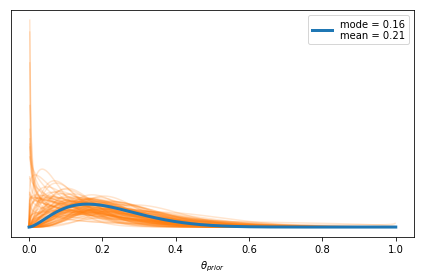

In [35]:
x = np.linspace(0, 1, 500)
for i in np.random.randint(0, len(trace), size = 100):
    u = trace['mu'][i]
    k = trace['kappa'][i]
    pdf = stats.beta(u * k, (1.0 - u) * k).pdf(x)
    plt.plot(x, pdf, 'C1', alpha = 0.2)
    
u_mean = trace['mu'].mean()
k_mean = trace['kappa'].mean()
dist = stats.beta(u_mean * k_mean, (1.0 - u_mean) * k_mean)
pdf = dist.pdf(x)
mode = x[np.argmax(pdf)]
mean = dist.moment(1)
plt.plot(x, pdf, lw = 3, label = f'mode = {mode:.2f}\nmean = {mean:.2f}')
plt.yticks([])

plt.legend()
plt.xlabel(r'$\theta_{prior}$')
plt.tight_layout()
plt.show()